# Winequality dataset

## Feim els imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SequentialFeatureSelector, SelectKBest, f_regression, RFE
from feature_engine.creation import MathematicalCombination, CombineWithReferenceFeature

## Preparam el dataset

En aquest apartat, unirem els dos datasets en un, després  

Funció que separa les features i les etiquetes, escalant les dades

In [2]:
def load_data(df):
    y=df.quality
    X=df.drop('quality',axis=1)
    X = min_max_scaler.fit_transform(X)
    return X, y

Carregam els datasets a dos dataframes a partir dels fitxers csv: winequality-red.csv i winequality-white.csv

Afegim una nova columna que indiqui el tipus de vi a cada dataset i juntam els dos datasets en un de nou

In [3]:
dfRed=pd.read_csv("winequality-red.csv", sep=";")
dfWhite=pd.read_csv("winequality-white.csv", sep=";")

dfRed['type']="Red"
dfWhite['type']="White"
df = pd.concat([dfRed,dfWhite])

Consultam les files del dataframe amb valors absents, no fa falta que eliminem cap ja que no n'hi cap amb valors absents

In [4]:
df[df.isna().any(axis=1)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type


Convertim les característiques categòriques (tipues) en númeriques

In [5]:
labelencoder = preprocessing.LabelEncoder()

df['type']=labelencoder.fit_transform(df['type'])

Recolocam les columnes per tenir la qualitat com a ultima columna. Això no fa falta fer-ho però ho feim per a que els gràfics i altres representacions visuals quedin més entendibles

In [6]:
df = df.reindex(columns=['fixed acidity', 'volatile acidity', 'citric acid', 
                       'residual sugar', 'chlorides', 'free sulfur dioxide',
                       'total sulfur dioxide', 'density', 'pH', 'sulphates', 
                       'alcohol', 'type', 'quality'])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,5


Amb el .describe() podrem veure alguns valors estadístics per a cada columna. Com la mitja, la desviació estàndard, els quartils, ...

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,0.753886,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.430779,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,1.000000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,1.000000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,1.000000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000,9.000000


Amb el .info() podem veure quantes files hi ha al dataframe i el seu tipus, com veim totes les columnes consten de valors numérics

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  type                  6497 non-null   int32  
 12  quality               6497 non-null   int64  
dtypes: float64(11), int32(1), int64(1)
memory usage: 685.2 KB


## Visualització i neteja de les dades

En aquest apartat farem diverses representacións gràfiques de les dades per poder visualitzar-les i decidir si llevam alguna mostra.

Amb el boxplot podem veure el màxim i mínim no atípic, els quartils, el rang interquartil, la mitja i els outilers de cada caracterísica

<AxesSubplot:>

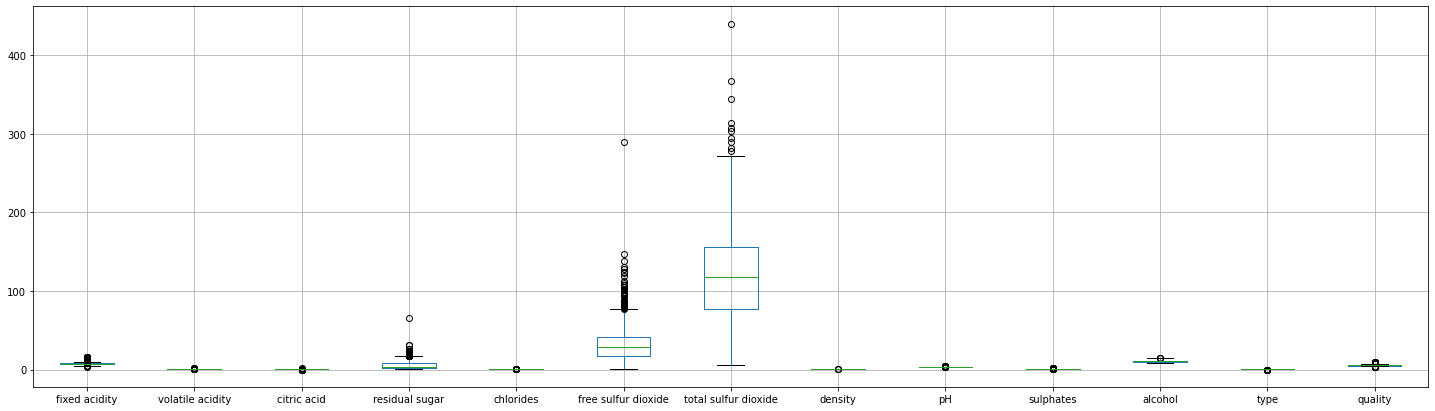

In [9]:
df.boxplot(figsize=(25,7))

Com podem veure tenim molts d'outliers, així que eliminarem els valors que estiguin per devall del percentil 0.5% i per damunt del 99.5%

Una altre manera de fer-ho és amb el següent codi que empra una fórmula basada en el rang interquartil, però trobàvem que eliminava massa files.
```python
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
```

In [10]:
# cols= ['fixed acidity', 'volatile acidity', 'citric acid', 
#                        'residual sugar', 'chlorides', 'free sulfur dioxide',
#                        'total sulfur dioxide', 'density', 'pH', 'sulphates', 
#                        'alcohol']

# Q01=df.quantile(0.005)
# Q99=df.quantile(0.995)

# print("Forma: ",df.shape)
# for col in cols:
#     df = df.drop(df[((df[col] < Q01[col]) | (df[col] > Q99[col]))].index)

# print("Forma de després d'eliminar els outliers: ",df.shape)
# df.boxplot(figsize=(25,7))


Visualitzam les correlacions de les característiques entre elles amb una matriu de correlacions, això ho feim per saber quines característiques estan més o menys relacionades entre si

<AxesSubplot:>

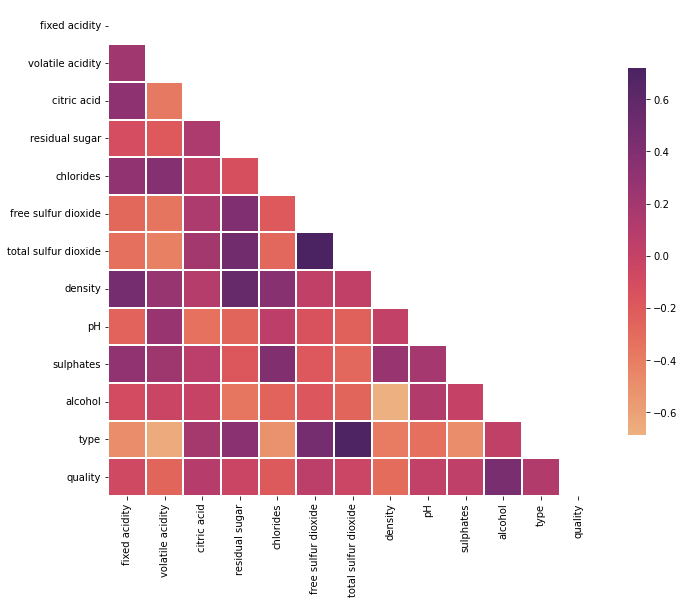

In [11]:
corr = df.corr()

# Generam una màscara pel triangle superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Preparam el gràfic de pyplot
f, ax = plt.subplots(figsize=(11, 9))

# Dibuixam el mapa de calor amb la màscara i alguns paràmetres extra per millorar el resultat visual
sns.heatmap(corr, mask=mask, cmap="flare", square=True, linewidths=.25, cbar_kws={"shrink": .75})


Graficam el valor que prenen les característiques númeriques del dataframe mitjançant un histograma

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

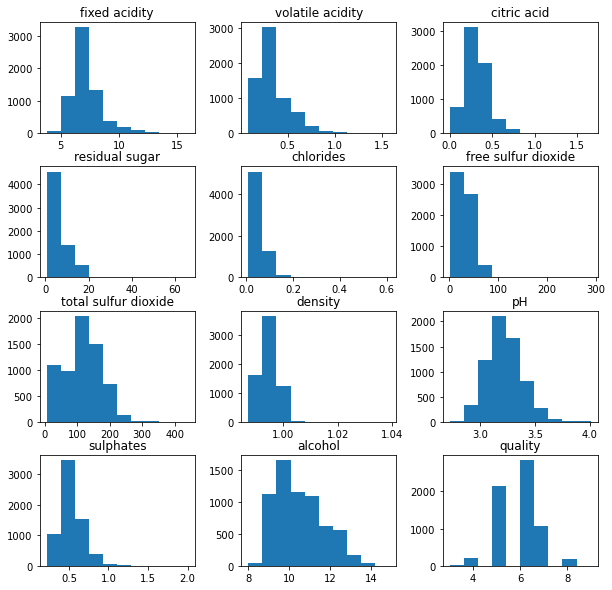

In [12]:
df.drop("type", axis=1).hist(figsize=(10,10), grid=False)

Gràfic cirular en el que podem veure la proporció de vi blanc i vermell del dataframe

1    75.388641
0    24.611359
Name: type, dtype: float64


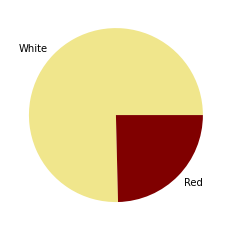

In [13]:
plt.pie(df['type'].value_counts(), labels = ["White","Red"], colors=["khaki","Maroon"])
print(df['type'].value_counts(normalize=True)*100)

## Separació del conjunt d'entrenament i el de test

Mesclam el dataframe i carregam les dades a les variables *features* (característiques) i *labels* (etiquetes). \

In [14]:
min_max_scaler = preprocessing.MinMaxScaler()
df = df.sample(frac=1) #No faria faltar mesclar-ho ja que després els classificadors faran un shuffle internament.

features, labels = load_data(df)

Per separar les dades en els conjunts d'entrenament i de test hem emprat la funció train_test_split

Hem decidit emprar un 80% entrenament i un 20% de test ja que  amb un valor més baix d'entrenament el model de regressió logistica i el del perceptró presentaven underfiting 


In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# **Classificadors**

Per a cada model imprimim el seu classification report, la precisió de training i la de testing. A més, guardam aquests dos valors dins dos dataframes externs per després poder comparar les modificacions que farem al dataframe original.

Hem decidit fer els models dins funcions per poder cridar-les des de l'apartat d'[Enginyeria de característiques/Proves](#Proves) fora haver de reescriure el codi.

In [16]:
dfTrainAccuracy = pd.DataFrame(columns=['Regressió Logística','Perceptró','Random Forest'])
dfTestAccuracy = pd.DataFrame(columns=['Regressió Logística','Perceptró','Random Forest'])

## Regressió Logística

Hem decidit donar-li valor al hiperparàmetre max_iters perquè amb el valor per defecte no arribava a convergir.


Regressio Logística:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         7
           4       1.00      0.00      0.00        42
           5       0.59      0.58      0.58       436
           6       0.51      0.74      0.61       559
           7       0.47      0.14      0.21       222
           8       1.00      0.00      0.00        33
           9       1.00      0.00      0.00         1

    accuracy                           0.54      1300
   macro avg       0.80      0.21      0.20      1300
weighted avg       0.56      0.54      0.49      1300

training accuracy: 54.55070232826631
testing accuracy: 53.53846153846153

Confusion Matrix


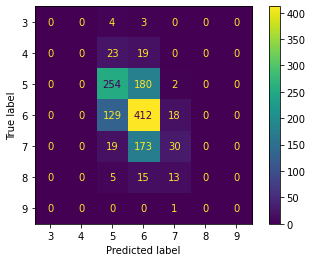

In [17]:
def RegressioLogistica(df, nom):
    features, labels = load_data(df)
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
    
    logreg = LogisticRegression(max_iter=5000)
    logreg.fit(X_train,y_train)

    y_predict = logreg.predict(X_test)
    

    print("\nRegressio Logística:")
    print(classification_report(y_test, y_predict,zero_division=1))
    
    training_accuracy = logreg.score(X_train,y_train)
    testing_accuracy = logreg.score(X_test,y_test)
    
    print('training accuracy:', training_accuracy*100)    
    print('testing accuracy:', testing_accuracy*100)
    
    #Afegim les dades a dos dataframes externs per després poder fer comparacions
    dfTrainAccuracy.at[nom,'Regressió Logística']=training_accuracy*100
    dfTestAccuracy.at[nom,'Regressió Logística']=testing_accuracy*100 
    
    print("\nConfusion Matrix")
    ConfusionMatrixDisplay(confusion_matrix(y_test,y_predict, labels=logreg.classes_), display_labels=logreg.classes_).plot()
    
    plt.show()

RegressioLogistica(df, "Original")

## Perceptró


Perceptró:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         7
           4       0.11      0.31      0.16        42
           5       0.62      0.09      0.16       436
           6       0.46      0.90      0.60       559
           7       0.29      0.01      0.02       222
           8       1.00      0.00      0.00        33
           9       1.00      0.00      0.00         1

    accuracy                           0.43      1300
   macro avg       0.64      0.19      0.13      1300
weighted avg       0.49      0.43      0.32      1300

training accuracy: 44.7758322108909
testing accuracy: 43.0

Confusion Matrix


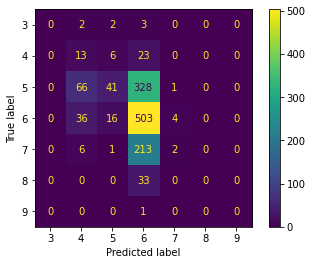

In [18]:
def Perceptro(df, nom):
    features, labels = load_data(df)
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
    
    perceptro = Perceptron()
    perceptro.fit(X_train,y_train)

    y_predict = perceptro.predict(X_test)
    
    print("\nPerceptró:")
    print(classification_report(y_test, y_predict,zero_division=1))
    
    training_accuracy = perceptro.score(X_train,y_train)
    testing_accuracy = perceptro.score(X_test,y_test)
    
    print('training accuracy:', training_accuracy*100)    
    print('testing accuracy:', testing_accuracy*100)
    
    #Afegim les dades a dos dataframes externs per després poder fer comparacions
    dfTrainAccuracy.at[nom,'Perceptró']=training_accuracy*100
    dfTestAccuracy.at[nom,'Perceptró']=testing_accuracy*100 
    
    print("\nConfusion Matrix")
    ConfusionMatrixDisplay(confusion_matrix(y_test,y_predict, labels=perceptro.classes_), display_labels=perceptro.classes_).plot()
    
    plt.show()

Perceptro(df, "Original")

## Random Forest

Hem decidit donar-li valor al hiperparàmetre max_depth perquè amb el valor per defecte teniem overfitting.


Random Forest:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         7
           4       0.62      0.12      0.20        42
           5       0.73      0.69      0.71       436
           6       0.64      0.79      0.70       559
           7       0.68      0.53      0.59       222
           8       1.00      0.33      0.50        33
           9       1.00      0.00      0.00         1

    accuracy                           0.67      1300
   macro avg       0.81      0.35      0.39      1300
weighted avg       0.69      0.67      0.66      1300

training accuracy: 97.96036174716183
testing accuracy: 67.46153846153847

Confusion Matrix


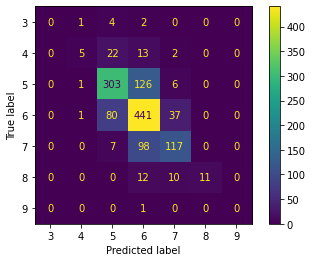

In [19]:
def RandomForest(df, nom):
    features, labels = load_data(df)
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
    
    rf = RandomForestClassifier(max_depth=14)
    rf.fit(X_train, y_train)

    y_predict=rf.predict(X_test)

    print("\nRandom Forest:")
    print(classification_report(y_test, y_predict,zero_division=1))
    
    training_accuracy = rf.score(X_train,y_train)
    testing_accuracy = rf.score(X_test,y_test)
    
    print('training accuracy:', training_accuracy*100)    
    print('testing accuracy:', testing_accuracy*100)
    
    #Afegim les dades a dos dataframes externs per després poder fer comparacions
    dfTrainAccuracy.at[nom,'Random Forest']=training_accuracy*100
    dfTestAccuracy.at[nom,'Random Forest']=testing_accuracy*100
    
    print("\nConfusion Matrix")
    ConfusionMatrixDisplay(confusion_matrix(y_test,y_predict, labels=rf.classes_), display_labels=rf.classes_).plot()  
    plt.show()
           
RandomForest(df, "Original")

## Conclusions


El millor model és el Random Forest ja que té una precisió del 69.5% ... COMENTAR UN POC CADA CLASIFICADOR

# **Enginyeria de característiques**

L'enginyeria de característiques (feature engineering) és el procés de selecció, extracció, creació i transformació de les característiques d'un dataset amb l'objectiu de millorar l'eficàcia d'un model predictiu.

Per dur a terme l'enginyeria de característiques hem seguit els següents apartats: 
- **Feature importances dels models**: Ens permet saber la importància de cada característica dins cada model amb el fí d'eliminar les característiques menys importants.
- **Correlacions màximes i mínimes**: Ens permet saber quines característiques tenen major correlació entre elles. També ens permet saber quines característiques tenen menys correlació amb la qualitat del vi per després poder eliminar-les.
- **Feature Selection**: Selecció de les característiques més i menys importants. S'implementaran els següents:
   1. Sequential Feature Selection
   2. Univariate Feature Selection amb Kbest
   3. Recursive Feature Elimination

## Feature importances de cada model

En aquest apartat emprarem els atributs dels models de classificació desenvolupats anteriorment per elegir les dues característiques amb menys importància

In [20]:
dfWquality=df.drop("quality", axis=1)

### Regressió logística <a id='Regressio-Logistica'></a>

Millor característica: volatile acidity
Pitjor característica alcohol


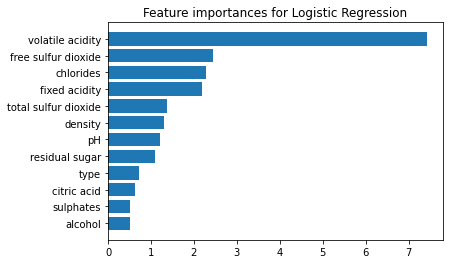

In [25]:
logreg = LogisticRegression(max_iter=5000)
logreg.fit(X_train,y_train)

logreg_odds = np.exp(logreg.coef_[0])
indices=np.argsort(logreg_odds)

fig, ax = plt.subplots()
ax.set_title("Feature importances for Logistic Regression")
ax.barh(range(len(logreg_odds)), logreg_odds[indices])
ax.set_yticks(range(len(logreg_odds)))
_ = ax.set_yticklabels(np.array(dfWquality.columns)[indices])

print("Millor característica:", dfWquality.columns[indices][-1])
pitjorLogReg =dfWquality.columns[indices][0]
print("Pitjor característica", pitjorLogReg)

### Perceptró <a id='Perceptro'></a>

Millor característica: free sulfur dioxide
Pitjor característica: sulphates


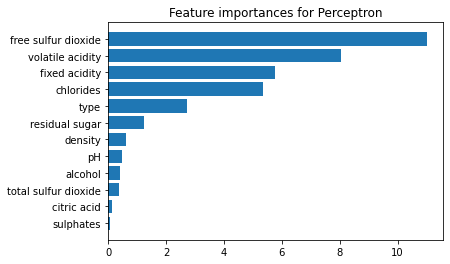

In [22]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

perceptron_odds = np.exp(perceptron.coef_[0])
indices=np.argsort(perceptron_odds)

fig, ax = plt.subplots()
ax.set_title("Feature importances for Perceptron")
ax.barh(range(len(perceptron_odds)), perceptron_odds[indices])
ax.set_yticks(range(len(perceptron_odds)))
_ = ax.set_yticklabels(np.array(dfWquality.columns)[indices])

print("Millor característica:", dfWquality.columns[indices][-1])
pitjorPerc =dfWquality.columns[indices][0]
print("Pitjor característica:", pitjorPerc)

### Random Forest <a id='Random-Forest'></a>

Millor característica: alcohol
Pitjor característica: type


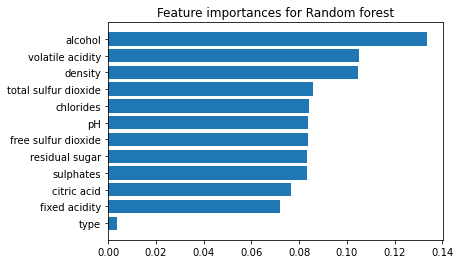

In [23]:
rf = RandomForestClassifier(max_depth=14)
rf.fit(X_train, y_train)

importancesRF = rf.feature_importances_
indices = np.argsort(importancesRF)

fig, ax = plt.subplots()
ax.set_title("Feature importances for Random forest")
ax.barh(range(len(importancesRF)), importancesRF[indices])
ax.set_yticks(range(len(importancesRF)))
_ = ax.set_yticklabels(np.array(dfWquality.columns)[indices])

print("Millor característica:", dfWquality.columns[indices][-1])
pitjorRF =dfWquality.columns[indices][0]
print("Pitjor característica:", pitjorRF)

### Comparativa entre models
| Model | Millor característica | Pitjor característica |
| ----------- | ----------- | ----------- |
| Regressió Logística | Volatile Acidity | Alcohol |
| Perceptró | Free sulfur dioxide | Sulphates |
| Random Forest | Alcohol | Type |

Ens pareix curiós que a la regressió logística la pitjor característica sigui l'alcohol però al random forest és la més important.

Els resultats poden variar depenent de l'execució, aquests valors són els obtinguts a una execució determinada.

## Correlacions màximes i mínimes <a id='Correlacions-Minimes'></a>

In [29]:
c = df.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)

print("Majors Correlacions")
print(so[13:23]) #Les 12 primeres son autocorrelacions
print("-------------")
print("Menors correlacions amb qualitat")
print(so['quality'][10:13])
pitjorsCorrelacions=so['quality'][10:13].to_dict().keys()

Majors Correlacions
free sulfur dioxide   total sulfur dioxide    0.720934
total sulfur dioxide  free sulfur dioxide     0.720934
type                  total sulfur dioxide    0.700357
total sulfur dioxide  type                    0.700357
density               alcohol                 0.686745
alcohol               density                 0.686745
volatile acidity      type                    0.653036
type                  volatile acidity        0.653036
residual sugar        density                 0.552517
density               residual sugar          0.552517
dtype: float64
-------------
Menors correlacions amb qualitat
sulphates         0.038485
residual sugar    0.036980
pH                0.019506
dtype: float64


Les característiques que tenen la major correlació amb la qualitat són el *Free sulfur dioxide* i el *Total sulfur dioxide*. \
Les característiques que tenen la menor correlació amb la qualitat són el *pH*, *residual sugars* i *sulphates*.

## [Feature Selection](https://www.scikit-learn.org/stable/modules/feature_selection.html)

El Feature Selection és un procés de selecció de característiques que ens ajudarà a reduir la quantitat de característiques del model per deixar les més importants

### [Sequential Feature Selector](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_select_from_model_diabetes.html#sphx-glr-auto-examples-feature-selection-plot-select-from-model-diabetes-py) <a id='Sequential-Feature-Selector'></a>


El Sequential Feature Selector funcia amb dos procediments diferents, el Forward-SFS i el Backward-SFS. 

El Forward-SFS és un procediment greedy que troba de manera iterativa la millor característica nova per afegir al conjunt de característiques seleccionades. Inicialment començam amb zero característiques i trobam la caracteristica que maximitza una calificació de cross-validation quan un estimador es entrenat amb aquesta característica concreta. Una vegada hem afegit aquesta característica repetim es procés afegint una nova característica al conjunt de característiques seleccionades. El proces acaba quan arriba al nombre de característiques seleccionades desitjat, determinat pel paràmetre n_features_to_select.

El Backward-SFS segueix la mateixa idea, però funciona en la direcció oposada: en lloc de començar sense cap característica i afegir-ne, començam amb totes les característiques i eliminam característiques del conjunt. El paràmetre direction controla si s'utilitza el Forward-SFS o el Backward-SFS.

In [ ]:
feature_names = np.array(dfWquality.columns)
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_train, y_train)

In [ ]:
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select=10, direction="forward"
).fit(X_train, y_train)


sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select=10, direction="backward"
).fit(X_train, y_train)

pitjorSFSF=dfWquality.columns.difference(feature_names[sfs_forward.get_support()]).tolist()
pitjorSFSB=dfWquality.columns.difference(feature_names[sfs_backward.get_support()]).tolist()
print(type(pitjorSFSB))
print(
    "Features selected by forward sequential selection: "
    f"{feature_names[sfs_forward.get_support()]}"
    "\nFeatures not selected by forward sequential selection: "
    f"{pitjorSFSF}\n"
)

print(
    "Features selected by backward sequential selection: "
    f"{feature_names[sfs_backward.get_support()]}"
    "\nFeatures not selected by forward sequential selection: "
    f"{pitjorSFSB}"
)

### [Univariate Feature selection with Kbest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.GenericUnivariateSelect.html#sklearn.feature_selection.GenericUnivariateSelect) <a id='Univariate-feature-selection'></a> 


In [ ]:
mask = SelectKBest(f_regression, k=10).fit(X_train, y_train).get_support()

best_features = dfWquality.columns[mask].tolist()
pitjorsUFS = dfWquality.columns.difference(best_features).tolist()

print("Millors característiques: ", best_features)
print("Pitjors característiques: ", pitjorsUFS)

### [Recursive Feature Elimination](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE) <a id='Recursive-feature-elimination'></a> 


In [ ]:
feature_names = np.array(dfWquality.columns)
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X_train, y_train)

In [ ]:
rfe_selector = RFE(ridge, n_features_to_select=10).fit(X_train, y_train)

pitjorsRFE=dfWquality.columns.difference(feature_names[rfe_selector.get_support()]).tolist()
print(
    "Característiques triades pel recursive feature elimination: "
    f"{feature_names[rfe_selector.get_support()]}"
    "\nCaracterístiques no triades pel recursive feature elimination: "
    f"{pitjorsRFE}\n"
)

### 
| Tipus | 1ra Pitjor Caract. | 2na Pitjor Caract.|
| ----------- | ----------- | ----------- |
| Sequential Feature Selection - Forward| Free sulfur dioxide | Total sulfur dioxide |
| Sequential Feature Selection - backward| Chloride | Citric Acid |
| Univariate Feature Selection | pH | Sulphates |
| Recursive Feature Elimination | Citric Acid | Type |

## Proves <a id='Proves'></a>

### Eliminam característiques

In [ ]:
dfComentaris = pd.DataFrame(columns=['Comentaris'])

#### Característica de menor importància de la Regressió Logística

Com s'ha observat [aquí](#Regressio-Logistica), el Feature Selection de la Regressió Logística indica que és la característica amb menys importància.

In [ ]:
df_menor_LogReg = df.drop(pitjorLogReg,axis=1)

RegressioLogistica(df_menor_LogReg, "menor imp. LogReg")
Perceptro(df_menor_LogReg, "menor imp. LogReg")
RandomForest(df_menor_LogReg, "menor imp. LogReg")

dfComentaris.at["menor imp. LogReg",'Comentaris']=pitjorLogReg

#### Característica de menor importància del Perceptró

Com s'ha observat [aquí](#Perceptro), el Feature Selection del Perceptró indica que és la característica amb menys importància.

In [ ]:
df_menor_Perc = df.drop(pitjorPerc,axis=1)

RegressioLogistica(df_menor_Perc, "menor imp. Perc")
Perceptro(df_menor_Perc, "menor imp. Perc")
RandomForest(df_menor_Perc, "menor imp. Perc")

dfComentaris.at["menor imp. Perc",'Comentaris']=pitjorPerc

#### Característica de menor importància del Random Forest

Com s'ha observat [aquí](#Random-Forest), el Feature Selection del Random Forest indica que és la característica amb menys importància.

In [ ]:
df_menor_RF = df.drop(pitjorRF,axis=1)

RegressioLogistica(df_menor_RF, "menor imp. RF")
Perceptro(df_menor_RF, "menor imp. RF")
RandomForest(df_menor_RF, "menor imp. RF")

dfComentaris.at["menor imp. RF",'Comentaris']=pitjorRF

#### Característica amb les pitjors correlacions amb la qualitat

Com s'ha observat [aquí](#Correlacions-Minimes), són les tres característiques menys correlacionades amb la qualitat.

In [ ]:
df_Correlacions = df.drop(pitjorsCorrelacions,axis=1)

RegressioLogistica(df_Correlacions, "Pitjors carac. Correlacions")
Perceptro(df_Correlacions, "Pitjors carac. Correlacions")
RandomForest(df_Correlacions, "Pitjors carac. Correlacions")

dfComentaris.at["Pitjors carac. Correlacions",'Comentaris']=pitjorsCorrelacions

#### Característica amb les pitjors característiques del Forward Feature Selection

Com s'ha observat [aquí](#Sequential-Feature-Selector), ja que el Forward Feature Selection indica que són les dues pitjors característiques.

In [ ]:
df_SFSF = df.drop(pitjorSFSF,axis=1)

RegressioLogistica(df_SFSF, "Pitjors carac. SFSF")
Perceptro(df_SFSF, "Pitjors carac. SFSF")
RandomForest(df_SFSF, "Pitjors carac. SFSF")

dfComentaris.at["Pitjors carac. SFSF",'Comentaris']=pitjorSFSF

#### Pitjors característiques Backward Feature Selection

Com s'ha observat [aquí](#Sequential-Feature-Selector), el Backward Feature Selection indica que són les dues pitjors característiques.

In [ ]:
df_SFSB = df.drop(pitjorSFSB,axis=1)

RegressioLogistica(df_SFSB, "Pitjors carac. SFSB")
Perceptro(df_SFSB, "Pitjors carac. SFSB")
RandomForest(df_SFSB, "Pitjors carac. SFSB")

dfComentaris.at["Pitjors carac. SFSB",'Comentaris']=pitjorSFSB

#### Pitjors característiques Univariate Feature Selection

Com s'ha observat [aquí](#Univariate-feature-selection), el SelectKBest indica que són les dues pitjors característiques.

In [ ]:
df_UFS = df.drop(pitjorsUFS,axis=1)

RegressioLogistica(df_UFS, "Pitjors carac. UFS")
Perceptro(df_UFS, "Pitjors carac. UFS")
RandomForest(df_UFS, "Pitjors carac. UFS")

dfComentaris.at["Pitjors carac. UFS",'Comentaris']=pitjorsUFS

#### Pitjors característiques Recursive Feature Selection

Com hem vist [aquí](#Recursive-feature-elimination), el Recursive Feature Elimination indica que són les dues pitjors característiques.

In [ ]:
df_RFE = df.drop(pitjorsRFE,axis=1)

RegressioLogistica(df_RFE, "Pitjors carac. RFE")
Perceptro(df_RFE, "Pitjors carac. RFE")
RandomForest(df_RFE, "Pitjors carac. RFE")

dfComentaris.at["Pitjors carac. RFE",'Comentaris']=pitjorsRFE

### Cream característiques

#### Àcids totals

In [ ]:
combinator_Acid_Tot = MathematicalCombination(
    variables_to_combine=['fixed acidity', 'volatile acidity'],
    math_operations = ['sum'],
    new_variables_names = ['total_acidity']
)

df_Acid_Tot = combinator_Acid_Tot.fit_transform(df)

RegressioLogistica(df_Acid_Tot, "Acid Totals")
Perceptro(df_Acid_Tot, "Acid Totals")
RandomForest(df_Acid_Tot, "Acid Totals")

#### Percentatge d'àcid cítric respecte de l'acidesa fixada

In [ ]:
combinator_PercAC = CombineWithReferenceFeature(
    variables_to_combine=['citric acid'],
    reference_variables=['fixed acidity'],
    operations=['div'],   
    new_variables_names=['percentage_citric_acid'])

df_PercAC = combinator_PercAC.fit_transform(df)

RegressioLogistica(df_PercAC, "Perc. acid citric")
Perceptro(df_PercAC, "Perc. acid citric")
RandomForest(df_PercAC, "Perc. acid citric")

#### Minerals totals

In [ ]:
combinator_Minerals_Totals = MathematicalCombination(
    variables_to_combine=['chlorides', 'sulphates'],
    math_operations = ['sum'],
    new_variables_names = ['total_minerals']
)

df_Minerals_Totals = combinator_Minerals_Totals.fit_transform(df)

RegressioLogistica(df_Minerals_Totals, "Minerals totals")
Perceptro(df_Minerals_Totals, "Minerals totals")
RandomForest(df_Minerals_Totals, "Minerals totals")

#### Percentatge de diòxid de sofre lliure

In [ ]:
combinator_PercSO2 = CombineWithReferenceFeature(
    variables_to_combine=['free sulfur dioxide'],
    reference_variables=['total sulfur dioxide'],
    operations=['div'],   
    new_variables_names=['percentage_free_sulfur'])

df_PercSO2 = combinator_PercSO2.fit_transform(df)

RegressioLogistica(df_PercSO2, "Perc. SO2 lliure")
Perceptro(df_PercSO2, "Perc. SO2 lliure")
RandomForest(df_PercSO2, "Perc. SO2 lliure")

#### Diòxid de sofre no lliure

In [ ]:
combinator_No_FreeSO2 = CombineWithReferenceFeature(
    variables_to_combine=['total sulfur dioxide'],
    reference_variables=['free sulfur dioxide'],
    operations=['sub'],
    new_variables_names=['non_free_sulfur_dioxide']
)

df_No_FreeSO2 = combinator_No_FreeSO2.fit_transform(df)

RegressioLogistica(df_No_FreeSO2, "S02 no lliure")
Perceptro(df_No_FreeSO2, "S02 no lliure")
RandomForest(df_No_FreeSO2, "S02 no lliure")


#### Dels diòxid de sofre quin percentatge és una sal

In [ ]:
combinator_Sulfurs_Sals = CombineWithReferenceFeature(
    variables_to_combine=['sulphates'],
    reference_variables=['free sulfur dioxide'],
    operations=['div'],
    new_variables_names=['percentage_salt_sulfur']
)

df_Sulfurs_Sals = combinator_Sulfurs_Sals.fit_transform(df)

RegressioLogistica(df_Sulfurs_Sals, "Sulfurs Sals")
Perceptro(df_Sulfurs_Sals, "Sulfurs Sals")
RandomForest(df_Sulfurs_Sals, "Sulfurs Sals")


#### Prova

In [ ]:
df_Prova = combinator_Acid_Tot.fit_transform(df)
df_Prova = combinator_PercSO2.fit_transform(df_Prova)

RegressioLogistica(df_Prova, "Prova")
Perceptro(df_Prova, "Prova")
RandomForest(df_Prova, "Prova")

#### Unim totes les creacions

In [ ]:
df_Unió = combinator_Acid_Tot.fit_transform(df)
df_Unió = combinator_Minerals_Totals.fit_transform(df_Unió)
df_Unió = combinator_PercAC.fit_transform(df_Unió)
df_Unió = combinator_No_FreeSO2.fit_transform(df_Unió)
df_Unió = combinator_PercSO2.fit_transform(df_Unió)
df_Unió = combinator_Sulfurs_Sals.fit_transform(df_Unió)

RegressioLogistica(df_Unió, "Totes creacions")
Perceptro(df_Unió, "Totes creacions")
RandomForest(df_Unió, "Totes creacions")

### Comparam les precisions

In [ ]:
print("Training accuracy for each model and each dataframe\n", dfTrainAccuracy)
print("\nTesting accuracy for each model and each dataframe\n", dfTestAccuracy)
print("\n\nLes features eliminades han sigut", dfComentaris)

In [ ]:
dfDiffs = pd.DataFrame(columns=['Regressió Logística','Perceptró','Random Forest'])
for index, row in dfTestAccuracy.iterrows():
    dfDiffs.at[row.name]=row-dfTestAccuracy.loc['Original']
dfDiffs['Media'] = dfDiffs.mean(axis=1)
print(dfDiffs)

# **Grid Search CV**

In [ ]:
features, labels = load_data(df)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

### Regressió Logística

In [ ]:
param_grid = {
    'penalty': ['l2', 'l1', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [10,100,1000,2500,5000,7500,10000],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}
# Create a based model
logreg = LogisticRegression()
# Instantiate the grid search model
grid_search_logreg = GridSearchCV(estimator = logreg, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search_logreg.fit(X_train, y_train)

print(grid_search_logreg.best_params_)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_predict=logreg.predict(X_test)

print("\nLogistic Regression:")
print(classification_report(y_test, y_predict,zero_division=1))

training_accuracy = logreg.score(X_train,y_train)
testing_accuracy = logreg.score(X_test,y_test)

print('training accuracy:', training_accuracy*100)    
print('testing accuracy:', testing_accuracy*100)

print("\nConfusion Matrix")
ConfusionMatrixDisplay(confusion_matrix(y_test,y_predict, labels=logreg.classes_), display_labels=logreg.classes_).plot()  
plt.show()

#---------------------------------------------------------------------------

logregTunnedParams = logreg.set_params(**grid_search_logreg.best_params_)
logregTunnedParams.fit(X_train, y_train)

y_predict=logregTunnedParams.predict(X_test)

print("\nLogistic Regression:")
print(classification_report(y_test, y_predict,zero_division=1))

training_accuracy = logregTunnedParams.score(X_train,y_train)
testing_accuracy = logregTunnedParams.score(X_test,y_test)

print('training accuracy:', training_accuracy*100)    
print('testing accuracy:', testing_accuracy*100)

print("\nConfusion Matrix")
ConfusionMatrixDisplay(confusion_matrix(y_test,y_predict, labels=logregTunnedParams.classes_), display_labels=logregTunnedParams.classes_).plot()  
plt.show()

### Perceptró

In [ ]:
param_grid = {
    'penalty': ['l2', 'l1', 'elasticnet', 'none'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [100,1000,2500,5000,7500,10000],
    'early_stopping': [True, False],
}
# Create a based model
perceptro = Perceptron()
# Instantiate the grid search model
grid_search_Perc = GridSearchCV(estimator = perceptro, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search_Perc.fit(X_train, y_train)

print(grid_search_Perc.best_params_)

In [ ]:
perc = Perceptron()
perc.fit(X_train, y_train)

y_predict=perc.predict(X_test)

print("\nPerceptron:")
print(classification_report(y_test, y_predict,zero_division=1))

training_accuracy = perc.score(X_train,y_train)
testing_accuracy = perc.score(X_test,y_test)

print('training accuracy:', training_accuracy*100)    
print('testing accuracy:', testing_accuracy*100)

print("\nConfusion Matrix")
ConfusionMatrixDisplay(confusion_matrix(y_test,y_predict, labels=perc.classes_), display_labels=perc.classes_).plot()  
plt.show()

#---------------------------------------------------------------------------

percTunnedParams = perc.set_params(**grid_search_Perc.best_params_)
percTunnedParams.fit(X_train, y_train)

y_predict=percTunnedParams.predict(X_test)

print("\nPerceptron:")
print(classification_report(y_test, y_predict,zero_division=1))

training_accuracy = percTunnedParams.score(X_train,y_train)
testing_accuracy = percTunnedParams.score(X_test,y_test)

print('training accuracy:', training_accuracy*100)    
print('testing accuracy:', testing_accuracy*100)

print("\nConfusion Matrix")
ConfusionMatrixDisplay(confusion_matrix(y_test,y_predict, labels=percTunnedParams.classes_), display_labels=percTunnedParams.classes_).plot()  
plt.show()

### Random Forest

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier(max_depth=14)
# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_search_rf.fit(X_train, y_train)

print(grid_search_rf.best_params_)


In [ ]:
y_predict=rf.predict(X_test)

print("\nRandom Forest:")
print(classification_report(y_test, y_predict,zero_division=1))

training_accuracy = rf.score(X_train,y_train)
testing_accuracy = rf.score(X_test,y_test)

print('training accuracy:', training_accuracy*100)    
print('testing accuracy:', testing_accuracy*100)

print("\nConfusion Matrix")
ConfusionMatrixDisplay(confusion_matrix(y_test,y_predict, labels=rf.classes_), display_labels=rf.classes_).plot()  
plt.show()

#---------------------------------------------------------------------------

rfTunnedParams = rf.set_params(**grid_search_rf.best_params_)
rfTunnedParams.fit(X_train, y_train)

y_predict=rfTunnedParams.predict(X_test)

print("\nRandom Forest:")
print(classification_report(y_test, y_predict,zero_division=1))

training_accuracy = rfTunnedParams.score(X_train,y_train)
testing_accuracy = rfTunnedParams.score(X_test,y_test)

print('training accuracy:', training_accuracy*100)    
print('testing accuracy:', testing_accuracy*100)

print("\nConfusion Matrix")
ConfusionMatrixDisplay(confusion_matrix(y_test,y_predict, labels=rfTunnedParams.classes_), display_labels=rfTunnedParams.classes_).plot()  
plt.show()
